In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
## load dataset
train= pd.read_csv("C:/Users/LZ575NE/OneDrive - EY/Desktop/pyprograms/Insurance/Cross sell health insurance prediction/train.csv")

In [3]:
train.shape

(381109, 12)

In [4]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [5]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
## EDA

In [6]:
num_col=['Age', 'Region_Code','Annual_Premium','Vintage']
cat_col=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

## EDA

In [103]:
## statistical analysis based on categorical and Numerical data 
## Population Analysis

In [7]:
train[num_col].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


In [37]:
#train[cat_col].describe()

,Driving_License,Previously_Insured,Response
count,381109.000000,381109.000000,381109.000000
mean,0.997869,0.458210,0.122563
std,0.046110,0.498251,0.327936
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [105]:
## general info count
##train.groupby('Gender')['Gender'].agg('count')

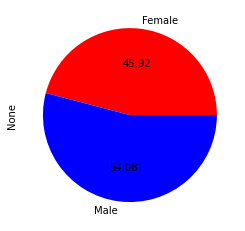

In [119]:
#plt.pie(train, labels= Gender, )
train.groupby('Gender').size().plot(kind='pie',colors=['red','blue'], autopct='%.2f')
plt.show()

(array([128040.,  43931.,  37485.,  47888.,  46726.,  26652.,  22318.,
         14719.,  11397.,   1953.]),
 array([20. , 26.5, 33. , 39.5, 46. , 52.5, 59. , 65.5, 72. , 78.5, 85. ]),
 <BarContainer object of 10 artists>)

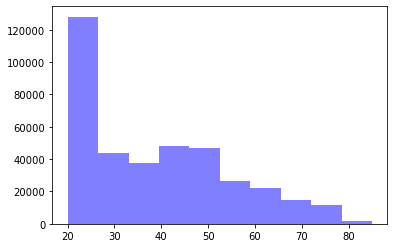

In [120]:
plt.hist(train['Age'], color='blue',alpha=0.5, bins=10)

C:\Users\LZ575NE\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

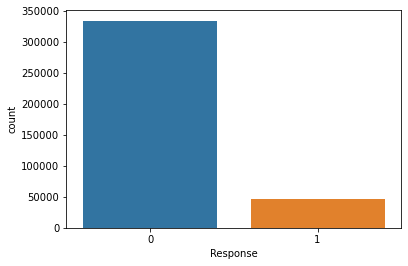

In [87]:
## cheking gender Response rates 
##seaborn.countplot() is used to Show the counts of observations in each categorical bin using bars
sns.countplot(train.Response)

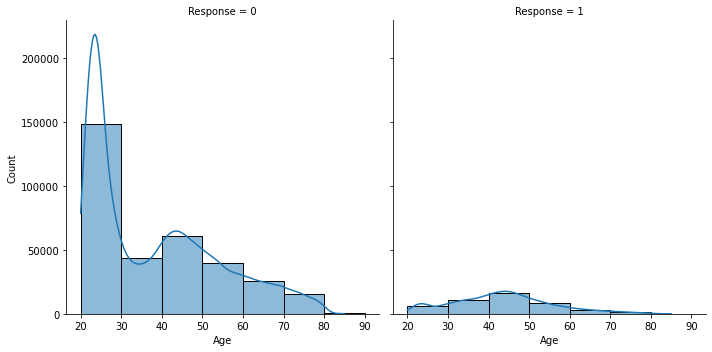

In [64]:
## customer Age Vs Response distribution
sns.displot(data=train, x="Age", col="Response", binwidth=10, kde=True)

In [8]:
train.groupby('Vehicle_Age')['Vehicle_Age'].agg('count')

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

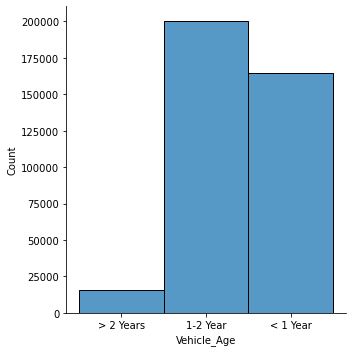

In [76]:
sns.displot(train.Vehicle_Age)

In [11]:
train.groupby(['Gender','Response'])['id'].count()

Gender  Response
Female  0           156835
        1            18185
Male    0           177564
        1            28525
Name: id, dtype: int64

In [115]:
df1 =train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df1

,Gender,Response,count
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


Text(0, 0.5, 'Response')

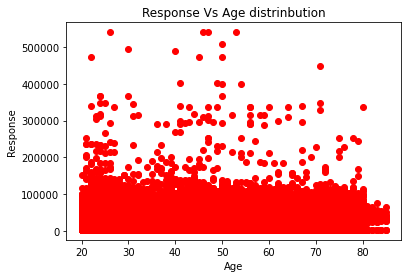

In [86]:
## Response Vs Age distrinbution
plt.scatter(train["Age"], train["Annual_Premium"], color= "red")
plt.title("Response Vs Age distrinbution")
plt.xlabel("Age")
plt.ylabel("Response")

In [90]:
# Driving license Vs Gender
#train.groupby('Driving_License')['Driving_License'].count()

Driving_License
0       812
1    380297
Name: Driving_License, dtype: int64

In [12]:
df= train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


In [122]:
## now lets analysise the Dl as per Gender
#sns.barplot(train["Gender"], train["Driving_License"])
#plt.title("Dl distribution")

In [124]:
sns.catplot(x="Gender", y="Driving_License",data= df1, kind="bar");

ValueError: Could not interpret input 'Driving_License'

C:\Users\LZ575NE\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

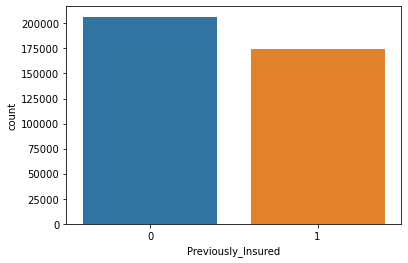

In [125]:
sns.countplot(train.Previously_Insured)

# Vechile Analysis

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

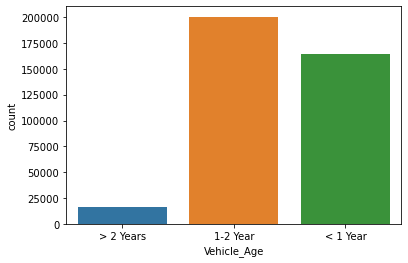

In [134]:
## Vehicle age analysis
sns.countplot(x= 'Vehicle_Age', data= train)

In [139]:
df2 =train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df2

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


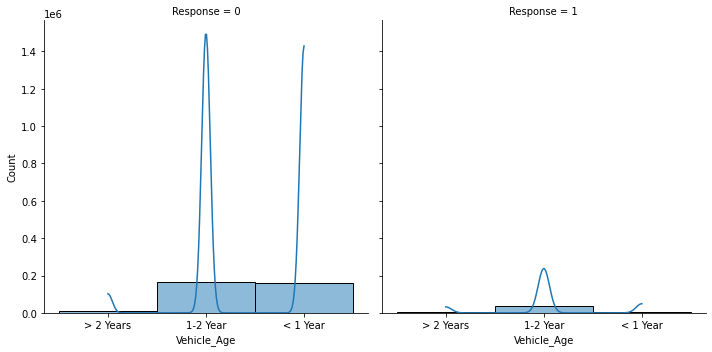

In [140]:
sns.displot(data=train, x="Vehicle_Age", col="Response", binwidth=10, kde=True)